<div style="border:solid Chocolate 2px; padding: 40px">

Привет Денис, меня зовут Саша Атаков. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех👍:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<b><font color='orange'>Вот тебе полезная ссылка, вдруг подчерпнешь что-то новое для себя):</font></b>
* Полезная статья о дисбалансе классов: https://habr.com/ru/post/349078/
* Полезная статья о auc-roc кривых итп: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/
* OHE: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
* Предсказание auc_roc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html


<b><font color='orange'>Общее впечатление</font></b>
* Большое спасибо за проделанную работу. Видно, что ты отлично освоил тему.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать, ведь критические ошибки требуют внимания. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* В конце прописал свой комментарий по всему проекту, ознакомься с ним, пожалуйста)
* С радостью отвечу на твои вопросы, касательно выданной тебе темы, если они есть. Жду новую версию проекта.)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/datasets/Churn.csv')

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Хороший шаг - импортировать все необходимые библиотеки перед работой с проектом, ведь так ты точно не запутаешься в том, какие библиотеки ты уже импортировал, а какие стоит добавить. Молодец!
</div>

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Тут хотел бы посоветовать разделить данную ячейку на две: в первой ты проводишь импорт библиотек, а во второй реализуешь загрузку датасета
</div>

In [27]:
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Вначале нужно просмотреть данные, проанализировать и высказать причину удаления признаков
</div>

In [28]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB



<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Заполнение пропусков значением из признака может сильно исказить наше распределение, поэтому рекомендую заполнить пропуски медианой, а также можно удалить пропуски - их у нас менее 10%, поэтому подойдет
</div>


<div class="alert alert-block alert-danger">
<b>Ошибка❌ В2:</b> 
    
Пропуски с проблемой заполнил, все также - поправь
</div>

In [29]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Исследование задачи

<AxesSubplot:title={'center':'Соотношение тех, кто остался и тех кто ушел'}>

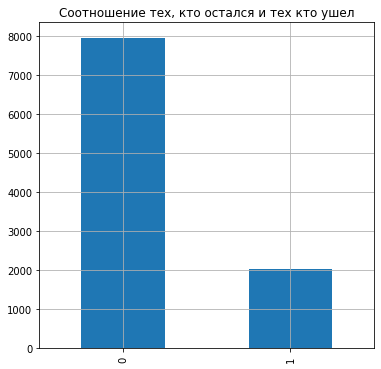

In [30]:
data['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(6,6),title='Соотношение тех, кто остался и тех кто ушел')

Соотношение 1:4. Значит присутствует дисбаланс данных

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Да, дисбаланс такой присутствует - нужно что-то делать
</div>

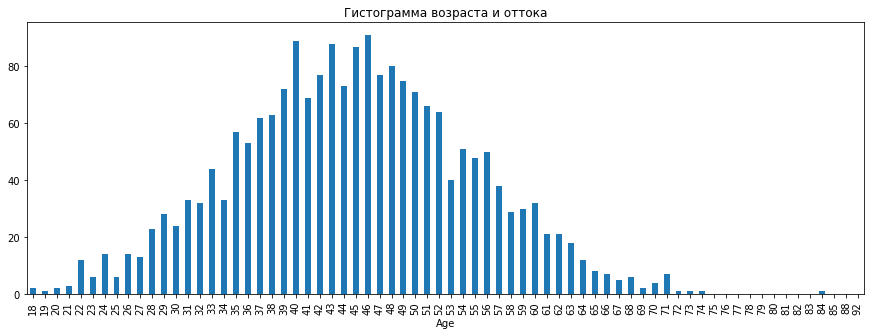

In [31]:
data.groupby('Age')['Exited'].sum().plot(figsize=(15,5),kind='bar',title='Гистограмма возраста и оттока')
plt.show()

По графику видно, что люди от 39 до 52 уходят чаще остальных

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Да, абсолютно согласен, наверное из-за того, что такой возраст также показывает нам разброс клиентов)
</div>

In [32]:
data_ohe = pd.get_dummies(data, drop_first=True)

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Смотри, ты используешь get_dummies, но ведь есть в sklearn гораздно более эффективный метод, который работает по такому же алгоритму - OHE (https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc). Если смотреть на работу внутри библиотеки sklearn, то get_dummies подходит для анализа данных, а для машинного обучения более предпочтителен OHE, т.к. он позоволяет избежать ряда ошибок при обучении моделей
    
Также по поводу преобразования всего датасета, а не по частям - кодирование всего датасета некорректно, т.к. мы не знаем какие категории попадут в готовую модель и не будет ли там категорий, которых не было в трейне (именно в нашем проекте такого момента нет, но мы, как будущие профи, должны рассматривать все возможные случаи). Также хотел бы сразу предупредить тебя в том, что преобразуем после деления на выборки только тогда, когда используем OneHotEncoding. Применяя get_dummies, ты должен использовать данный метод сразу ко всему датасету. В будущих проектах будет приниматься только OHE и только после разделения на выборки, поэтому запомни этот совет)
    
Да, я знаю, что в теории курса вам преподают именно get_dummies, но я просто хочу отметить, что есть другой метод, который работает намного лучше и его в основном используют на практике - можешь пока ознакомиться, потом проверишь)
</div>

In [33]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

In [34]:
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Вижу ты реализовал только две выборки - иногда такое да, можно делать, но сейчас лучше реализовать три так как: 
    
- так мы сможем эффективнее подготовить наши модели (обучаем на трейне, фитим на валиде и, если модель оказалась самой лучшей среди всех остальных, то проверяем ее на тесте)
- вводя третью выборку мы реализуем принцип слепой проверки, во время которого мы не даем нашим моделям увидеть тестовые данные, то есть у нас будет одна выборка, которая может сыграть роль "реальных данных". Тем самым мы можем разыграть сценарий ввода модели в продакшен)
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 В2:</b> 
    
Такс, сейчас ты все сделал верно)
</div>

In [35]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_31/1580900459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/1580900459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Грамотное применение масштабирование признаков, превосходно. Кстати, касательно категориальных признаков (если ты применишь алгоритм OHE из sklearn) - они преобразовываются по такому же алгоритму действий
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Как добавишь тестовую выборку, сразу преобразуй и здесь
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 В2:</b> 
    
Да, вот так и надо)
</div>

Избавились от категориальных признаков методом One hot encoder

In [36]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:")
    print("Дерево решений", DTC_score, "| Случайный лес ", RFC_score, "| Логистческая регрессия", LgR_score)

In [37]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8585 | Логистческая регрессия 0.802


In [38]:
best = best_depth = best_est = 0
for depth in range(1, 16):
    for est in range(1,50):
        model_RFC = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model_RFC.fit(features_train, target_train)
        predictions = model_RFC.predict(features_valid)
        #print('Глубина:', depth, 'est:', est, 'F1:', f1_score(target_valid, predictions))
        if best < f1_score(target_valid, predictions):
            best = f1_score(target_valid, predictions)
            best_depth = depth
            best_est = est
print(best, best_depth, best_est)

0.5999999999999999 14 9


Лучший показатель F1 = 0.598 при max_depth=13 и n_estimators=9

In [39]:
RFC_probabilities_one_valid = model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)
auc_roc_RFC

0.8402278322515865

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Такс, модель верно обучил + метрику хорошо проверил - класс)
</div>

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Нужно объединить перебор гиперпараметров - так ты сможешь получить большее качество, так как перебор гиперпараметрво вместе поможет найти оптимальную вариацию всех гиперпараметров
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Я тут заметил, что AUC-ROC метрика отсутствует - добавь ее. И не забудь про то, что она определяется по вероятностям, а не по предсказаниям.(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) 
    
Также не забудь про то, что ее нужно добавить к каждой модели, где ты проверяешь метрику f1, так как бизнес потребовал проверить ее тоже
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 В2:</b> 
    
метрика появилась и верно проверяется)
</div>

In [40]:
best = best_depth = 0
for depth in range(1,51):
    model_DTC = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_DTC.fit(features_train, target_train)
    predictions = model_DTC.predict(features_valid)
    if best < f1_score(target_valid, predictions):
        best = f1_score(target_valid, predictions)
        best_depth = depth
print('Лучший показатель F1 = {} при глубине = {}'.format(best, best_depth))

Лучший показатель F1 = 0.5696969696969697 при глубине = 6


In [41]:
DTC_probabilities_one_valid = model_DTC.predict_proba(features_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, DTC_probabilities_one_valid)
auc_roc_DTC

0.6837644190927842

In [42]:
model_LgR = LogisticRegression(random_state=12345, solver='liblinear')
model_LgR.fit(features_train, target_train)
predictions = model_LgR.predict(features_valid)
print('F1:', f1_score(target_valid, predictions))

F1: 0.33108108108108103


In [43]:
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]
auc_roc_LgR = roc_auc_score(target_valid, LgR_probabilities_one_valid)
auc_roc_LgR

0.7587588238496482

Вывод: Рассматривая данные с дисбалансом тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайны лес. При лучшем значении max_depth=14 и n_estimators=9, мы имеем F1=0,598.

## Борьба с дисбалансом

In [48]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


In [49]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


<b>Проверим upsample</b>

In [50]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


In [51]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8585 | Логистческая регрессия 0.802


In [52]:
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:
Дерево решений 0.793 | Случайный лес  0.8105 | Логистческая регрессия 0.702


<b>Проверим downsample</b>

In [64]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 1)
print(target_train_downsampled.value_counts(normalize = 1))
print(target_train_downsampled.shape)

0    0.800667
1    0.199333
Name: Exited, dtype: float64
(6000,)


In [65]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8585 | Логистческая регрессия 0.802


In [66]:
all_models_accuracy(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8605 | Логистческая регрессия 0.802


###### downsample показывает себя хуже, чем upsample. Поэтому буду использовать upsample

In [102]:
best = best_depth = best_est = 0
for depth in range(1, 16):
    for est in range(1,50):
        model_RFC_upsampled = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
        predictions = model_RFC_upsampled.predict(features_valid)
        #print('Глубина:', depth, 'est:', est, 'F1:', f1_score(target_valid, predictions))
        if best < f1_score(target_valid, predictions):
            best = f1_score(target_valid, predictions)
            best_depth = depth
            best_est = est
#print(best, best_depth, best_est)
print('Лучший показатель F1={}, при max_depth={} и n_estimatos={}'.format(best, best_depth, best_est))

0.6329723225030085 13 35
Лучший показатель F1=0.6329723225030085, при max_depth=13 и n_estimatos=35


In [103]:
RFC_upsampled_valid = model_RFC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_upsampled_valid)
auc_roc_RFC

0.8371466679571011

In [104]:
best = best_depth = 0
for depth in range(1,51):
    model_DTC_upsampled = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
    predictions = model_DTC_upsampled.predict(features_valid)
    if best < f1_score(target_valid, predictions):
        best = f1_score(target_valid, predictions)
        best_depth = depth
print('Лучший показатель F1 = {}, при глубине = {}'.format(best, best_depth))

Лучший показатель F1 = 0.5963791267305644, при глубине = 5


In [105]:
DTC_upsampled_valid = model_DTC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, DTC_upsampled_valid)
auc_roc_DTC

0.6564324124873728

In [106]:
model_LgR_upsampled = LogisticRegression(random_state=12345, solver='liblinear')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
predictions = model_LgR_upsampled.predict(features_valid)
print('F1:', f1_score(target_valid, predictions))

F1: 0.4875962360992301


In [107]:
LgR_upsampled_valid = model_LgR_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_LgR = roc_auc_score(target_valid, LgR_upsampled_valid)
auc_roc_LgR

0.7633938022852786

Показаели всех моделей улучшились.

Лучшие результаты показывает алгоритм случайный лес (RandomForestClassifier). На валидационной выборке RandomForestClassifier уже показывает резульаты F1 меры = 0.63, что выше целевого целевого значения.

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Функция увеличения выборки есть, она расписана верно - молодец!
</div>

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Но я бы тут еще проверил баланс классов после преобразования выборки - вдруг проблема с балансом не исправилась
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
дисбаланс в данных у тебя остался после преобразования методами upsample и downsample - тебе нужно взять другие числа repeat и fraction
</div>    


<div class="alert alert-block alert-success">
<b>Успех👍 В2:</b> 
    
С upsample и downsample - функции реализовал верно, данные преобразовал верно)
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌ В2:</b> 
    
Ты реализовал только upsample, а вот downsample на моделях ты не проверял - добавь и проверь, также как ты и сделал upsample  
</div>    


## Тестирование модели

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Этап тестирования - это проверка лучшей модели из тех, что мы обучали на этапе "исследование задачи" (несбалансированные данные) и "борьба с дисбалансом" (сбалансированные данные) и с этапа "борьба с дисбалансом" выявили лучшую, которую и проверим на "тестирование модели". Перекинь весь код, где ты ищешь лучшую модели после балансировки классов
    
Потом правда на тесте тебе нужно оставить одну лучшую модель, с лучшим методом балансировки классов и гиперпараметрами, которые лучше всего подходят для такой модели. Ну и проверь на тестовых данных на данном этапе)
</div>

In [73]:
model_RFC_final = RandomForestClassifier(max_depth= 13, n_estimators = 35, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)
model_RFC_final_prediction = model_RFC_final.predict(features_test)
print('F1 :',f1_score(target_test, model_RFC_final_prediction))

F1 : 0.5918854415274463


<div class="alert alert-block alert-danger">
<b>Ошибка❌ В2:</b> 
    
Хмм, а вот использовать два метода борьбы с дисбалансом в одной модели не стоит, по проекту нужно методы по отдельности проверять, так мы сможем выявить лучший метод и модель. В данной ячейке убери class_weight - проверяй только свой лучший метод) 
</div>

In [69]:
model_RFC_final_valid = model_RFC_final.predict_proba(features_test)[:, 1]
auc_roc_RFC = roc_auc_score(target_test, model_RFC_final_valid)
auc_roc_RFC

0.8447668988758317

In [70]:
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [71]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_RFC_final_prediction))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, model_RFC_final_valid))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.829
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8447668988758317


Показатели финальной модели лучше, чем у константной. Следовательно модель можно считать адекватной

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*

В первоначальные данных наблюдался значительный дисбаланс, из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок.

Мы устранили дисбаланс классов в обучающей выборки методом upsampling — увеличили количество значений позитивного класса в 4 раза. Так мы достигли баланса классов обучеющей выборки: 0 - 0.501043 1 - 0.498957

Разобрали несколько вариантов борьбы с дисбалансом upsampling и downsampling

На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса:
F1-мера 0.6329723225030085
AUC-ROC 0.8371466679571011

aaccuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.8385
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.849258174916913

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Да, вывод хороший, если он касается только этапа тестирования)
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Но если он итоговый - то не хватает эксурса по всему проекту - что было сделано, какие выводы получили, какие мысли появились итп. ЛУчше добавь отдельно еще один вывод, но уже как итоговый)
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 В2:</b> 
    
Все, итоговый вывод записал, молодец)
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

<h2><b>Общий вывод по проекту</b></h2>

Ты очень постарался, спасибо тебе за такую работу!)

В ходе проекта были выполнены все этапы проекта, однако главная цель не достигнута. Конечно присутствует ряд моментов, которые необходимо рассмотреть, но ничего страшного, для это я здесь). Давай пройдемся по всему что ты сделал, чтобы понять что надо сделать для того, чтобы проект был засчитан:

- заполнение пропусков константой - искажение в данных, лучше либо удалить пропуски, либо медиану подставить
- тестовая выборка отсутствует - добавь
- auc_roc метрика отсутствует - добавь
- проблема с дисбалансом после преобразования на методах upsample и downsample
- реализация методов upsample и downsample выполнена не полностью - поправь
- добавь итоговый вывод
- Есть советы по проекту, если хочешь и есть время - реализуй их. Если нет, то запомни на будущее)
    
`Отдельно прошу тебя рассмотреть совет с кодирование категориальных признаков - это очень важный момент. В следующих проектах, тебе проставят за такую реализацию минус`

Работа классная, но нужно доработать! Удачи)

<div style="border:solid Chocolate 2px; padding: 40px">

<h2><b>Общий вывод по проекту В2</b></h2>

Есть проблемы, нужно будет их решить, однако проект стал сильнее - молодец!